# Landslide Analysis


In [445]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

sns.set_style('whitegrid')

### Importing the dataset

In [446]:
df = pd.read_csv('globallandslides.csv')
df_copy = pd.read_csv('globallandslides.csv')  # making a copy of dataframe 

In [447]:
pd.set_option('display.max_columns', None)

In [448]:
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [449]:
df = df[df.country_name=="India"]  # Selecting data for India 

In [450]:
df["Year"] = pd.to_datetime(df["event_date"]).dt.year    # This extracts the year in which the event took place

In [451]:
df = df[df.landslide_category=="landslide"]  # Selecting only landslide category

##  Task 1 : A map of only landslides that have happened within India

In [452]:
ls_df = df   # making a dataframe of landslides 
ls_df = ls_df.dropna(axis=0, subset=['admin_division_name'])

### Performing data cleaning

In [453]:
ls_df["admin_division_name"].replace("Nāgāland", "Nagaland",inplace = True) 
ls_df["admin_division_name"].replace("Meghālaya", "Meghalaya",inplace = True)
ls_df["admin_division_name"].replace("Tamil Nādu", "Tamil Nadu",inplace = True)
ls_df["admin_division_name"].replace("Karnātaka", "Karnataka",inplace = True)
ls_df["admin_division_name"].replace("Gujarāt", "Gujarat",inplace = True)
ls_df["admin_division_name"].replace("Arunāchal Pradesh", "Arunachal Pradesh",inplace = True)

C:\Users\USER\anaconda3\envs\landslide\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [454]:
state_df = ls_df["admin_division_name"].value_counts()   # This gives the number of landslides that took place in every state over the years
state_df = state_df.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State', 'Count']                    # Renaming the columns 

In [455]:
state_df.head()

,State,Count
0,Kashmir,189
1,Uttarakhand,167
2,Himachal Pradesh,137
3,Assam,74
4,Nagaland,65


In [456]:
state_df.at[15,"Count"] = 69   # Since the entries "Bengal" and "West Bengal" are same, therefore merging them as one entry.
state_df.drop(7)

,State,Count
0,Kashmir,189
1,Uttarakhand,167
2,Himachal Pradesh,137
3,Assam,74
4,Nagaland,65
5,Maharashtra,54
6,Manipur,47
8,Kerala,43
9,Arunachal Pradesh,40
10,Tamil Nadu,32


### Using GeoPandas to plot maps

In [457]:
fp = r'Maps_with_python\india-polygon.shp'
map_df = gpd.read_file(fp)                          # Reads the shape file of India to plotting purpose
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [458]:
state_df.at[0,"State"] = "Jammu and Kashmir"       # Renaming certaing entries to avoid conflicts while merging
state_df.at[20,"State"] = "Delhi"

In [459]:
#Merging the data
merged = map_df.set_index('st_nm').join(state_df.set_index('State'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged.head()

,id,geometry,Count
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",40.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",74.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",1.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.0


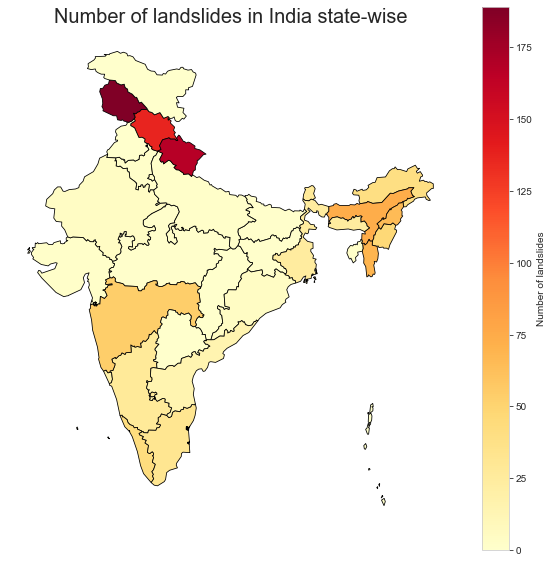

In [460]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of landslides in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})

# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', \
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of landslides"})

In [461]:
# Finding the latitudes and longitudes of landlides that took place in India
lat = df['latitude'].tolist()      
long = df['longitude'].tolist()

In [462]:
india_state_df = pd.read_csv('state wise lat and long.csv')
india_state_df.head()

,State,Longitude,Latitude
0,Andaman and Nicobar,92.904257,11.845455
1,Andhra Pradesh,79.973851,16.557796
2,Arunachal Pradesh,94.662314,27.729050
3,Assam,92.685686,26.336086
4,Bihar,85.625341,25.766303


In [463]:
india_state_df.at[0,"State"] = "Andaman and Nicobar Islands"       # Renaming certaing entries to avoid conflicts while merging
india_state_df.at[25,"State"] = "Odisha"  
india_state_df.at[33,"State"] = "Uttarakhand"  

In [464]:
# Merge the data
state_merged_df = map_df.set_index('st_nm').join(india_state_df.set_index('State'))

In [465]:
state_merged_df.reset_index(level=0, inplace=True)
state_merged_df.head()

,st_nm,id,geometry,Longitude,Latitude
0,Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",92.904257,11.845455
1,Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",94.662314,27.729050
2,Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",92.685686,26.336086
3,Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",85.625341,25.766303
4,Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",76.758725,30.742600


In [466]:
# Handling missign values
state_merged_df.at[36,"Latitude"] = 34.2268
state_merged_df.at[36,"Longitude"] = 77.5619
state_merged_df.at[28,"Latitude"] = 18.1124
state_merged_df.at[28,"Longitude"] = 79.0193

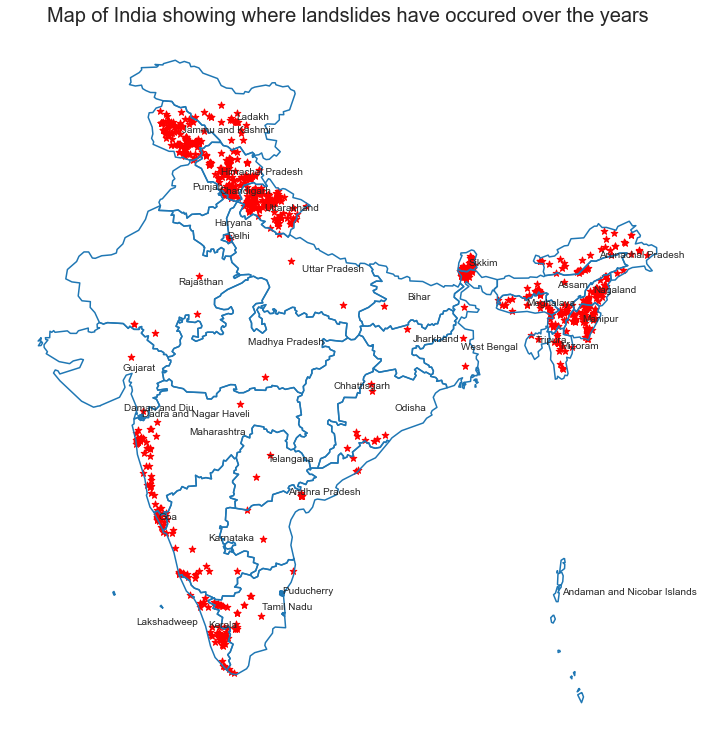

In [467]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (13,13))
ax.axis('off')
ax.set_title('Map of India showing where landslides have occured over the years', fontdict={'fontsize': '20', 'fontweight' : '10'})

map_df.boundary.plot(ax = ax)

geo_df = gpd.GeoDataFrame(geometry = geometry)

g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')

for i in range(len(state_merged_df)):
    plt.text(state_merged_df.Longitude[i],state_merged_df.Latitude[i],"{}".format(state_merged_df.st_nm[i]),size=10)
    
plt.show()


### The above analysis was at national level. However one can perform state-wise landslide analysis as well. Below is an example for the state of Assam

In [468]:
# Finding the latitudes and longitudes of landlides that took place in Assam
lat = df[df['admin_division_name'] == "Assam"]['latitude'].tolist()      
long = df[df['admin_division_name'] == "Assam"]['longitude'].tolist()

In [469]:
len(lat)

74

In [470]:
len(long)

74

In [471]:
fp = r'Districts\Census_2011\2011_Dist.shp'
assam_df = gpd.read_file(fp)                           # Reads the shape file of Assam to plotting purpose
assam_df .head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [472]:
assam_df  = assam_df[assam_df.ST_NM == "Assam"]

In [473]:
# Reads the data of latitudes and longitudes of the districts of Assam
district_df = pd.read_csv('district wise lat and long.csv')

In [474]:
district_df = district_df[district_df.State == "Assam"]

In [475]:
district_df.drop(['Population in 2001', 'Population in 2011'], axis='columns', inplace=True)

In [476]:
district_df.head()

,State,District,Latitude,Longitude
24,Assam,Barpeta,26.427872,90.979120
25,Assam,Bongaigaon,26.450125,90.673430
26,Assam,Cachar,24.815571,92.868497
27,Assam,Darrang,26.584632,92.041413
28,Assam,Dhemaji,27.586533,94.713369


In [477]:
# Merge the data
merged_df = assam_df.set_index('DISTRICT').join(district_df.set_index('District'))
merged_df.head()
merged_df = merged_df[merged_df.Latitude.notna()]
merged_df.head()

,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
DISTRICT,,,,,,,,
Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642...",Assam,26.427872,90.979120
Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153...",Assam,26.450125,90.673430
Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905...",Assam,24.815571,92.868497
Darrang,Assam,18,26,325,"POLYGON ((92.32865 26.67036, 92.33490 26.66867...",Assam,26.584632,92.041413
Dhemaji,Assam,18,9,308,"POLYGON ((94.58063 27.21371, 94.57922 27.21355...",Assam,27.586533,94.713369


In [478]:
merged_df.reset_index(level=0, inplace=True)
merged_df.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
0,Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642...",Assam,26.427872,90.979120
1,Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153...",Assam,26.450125,90.673430
2,Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905...",Assam,24.815571,92.868497
3,Darrang,Assam,18,26,325,"POLYGON ((92.32865 26.67036, 92.33490 26.66867...",Assam,26.584632,92.041413
4,Dhemaji,Assam,18,9,308,"POLYGON ((94.58063 27.21371, 94.57922 27.21355...",Assam,27.586533,94.713369


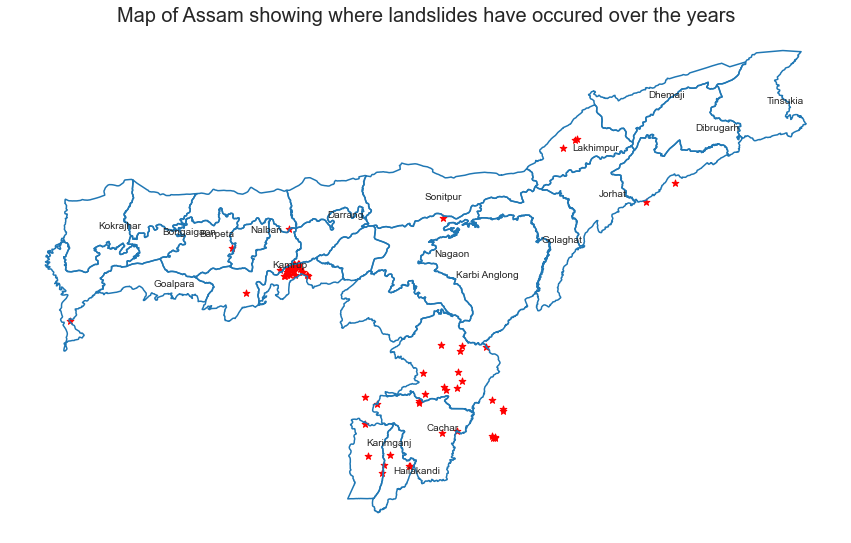

In [479]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
ax.axis('off')
ax.set_title('Map of Assam showing where landslides have occured over the years', fontdict={'fontsize': '20', 'fontweight' : '10'})

assam_df.boundary.plot(ax = ax)

geo_df = gpd.GeoDataFrame(geometry = geometry)

g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')

for i in range(len(district_df)):
    plt.text(merged_df.Longitude[i],merged_df.Latitude[i],"{}".format(merged_df.DISTRICT[i]),size=10)
    
plt.show()


## Task 2 : A plot showing the total number of landslides that have happened in India every year

In [480]:
y_values = df.groupby(['Year']).country_name.count().values

In [481]:
y_values.tolist()

[66, 46, 48, 226, 151, 75, 170, 68, 184, 68]

In [482]:
x_values = df.groupby(['Year']).country_name.count().index.values

In [483]:
x_values.tolist()

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

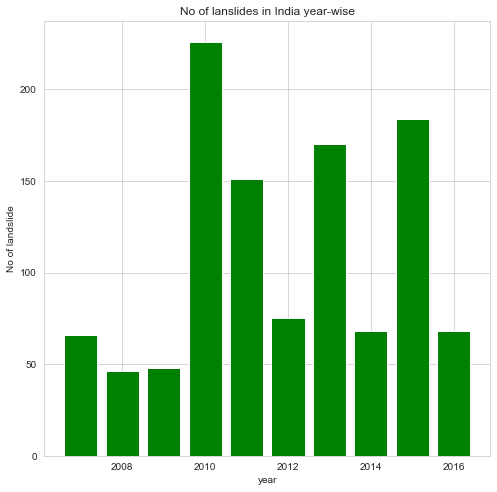

In [484]:
plt.figure(figsize = (8,8))
plt.bar(x_values,y_values, color = "green")
plt.xlabel("year")
plt.ylabel("No of landslide")
plt.title("No of lanslides in India year-wise")
plt.show()